In [1]:
import importlib
import sys

import numpy as np

# Force reload to avoid stale objects
if 'symbolic_bounds' in sys.modules:
    for mod in list(sys.modules.keys()):
        if mod.startswith('symbolic_bounds'):
            del sys.modules[mod]

from symbolic_bounds import DAG, DataGenerator, SCM, ProgramFactory
from symbolic_bounds.random_dag_generator import generate_random_partitioned_dag
import warnings
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

# Random DAG Generator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


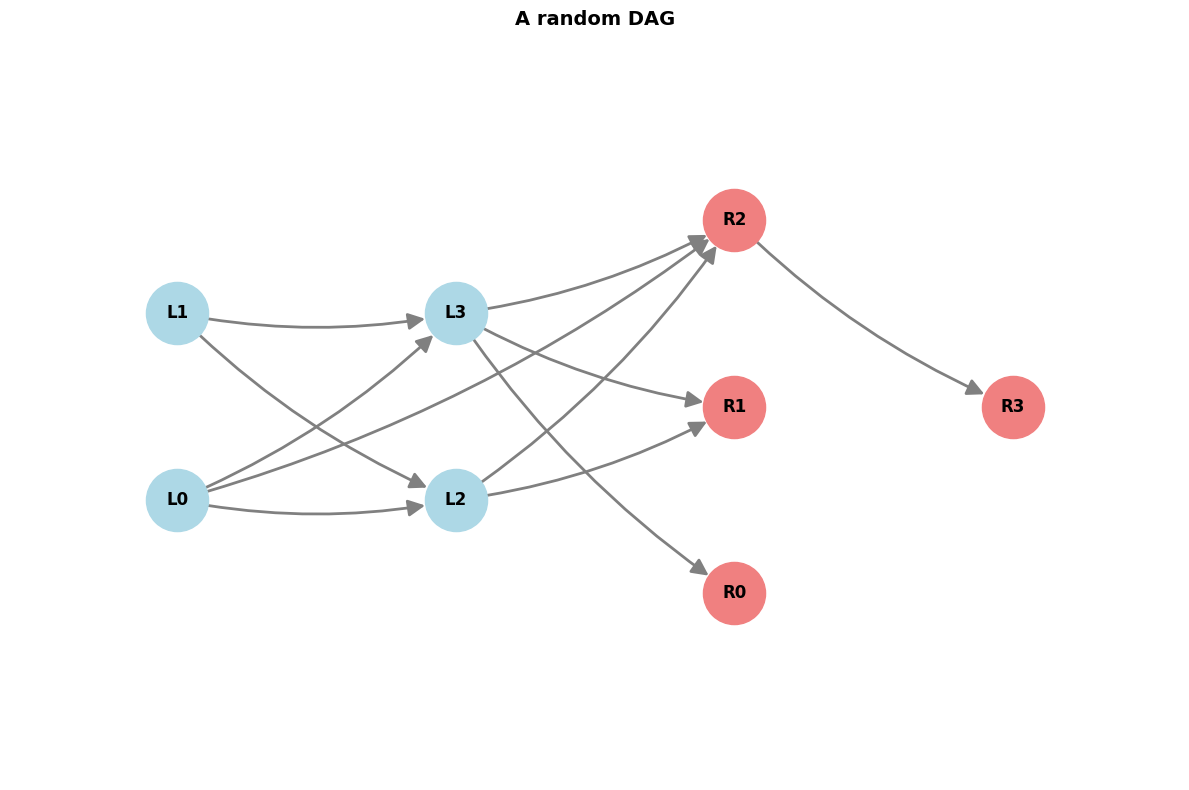

In [28]:
from symbolic_bounds.dag import DAG
%load_ext autoreload
%autoreload 2


from symbolic_bounds.random_dag_generator import (
    generate_random_partitioned_dag, 
    generate_random_chain_dag,
    generate_random_tree_dag,
    print_dag_summary
)
import matplotlib.pyplot as plt


tree_dag = generate_random_partitioned_dag(n=8)
# print_dag_summary(tree_dag)
fig3 = tree_dag.draw(figsize=(12, 8), title="A random DAG")
plt.show()

# validate_constraints(tree_dag, verbose=True)


# Potency Experiments

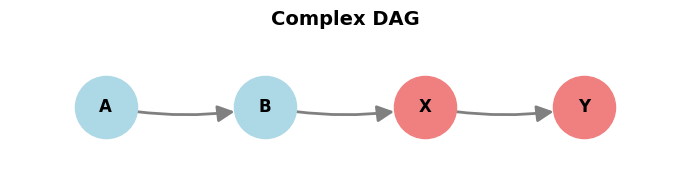

True P(Y=1 | do(X=1)) = 0.528551


ValueError: Y and X must be disjoint. Overlap: ['A']

In [26]:
# 1. Generate a confounding DAG
dag = DAG()
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
dag.add_edge(X, Y)
A = dag.add_node('A', support={0, 1}, partition='L')
B = dag.add_node('B', support={0, 1}, partition='L')
dag.add_edge(A, B)
dag.add_edge(B, X)


dag.generate_all_response_types()

fig = dag.draw(figsize=(7, 2), title="Complex DAG", with_labels=True)
plt.show()

# 3. Generate Data
generator = DataGenerator(dag, seed=2385)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]

# generator.print_true_distribution()
true_prob = generator.computeTrueIntervention(
    Y={Y}, 
    X={X}, 
    Y_values=(1,), 
    X_values=(1,)
)
print(f"True P(Y=1 | do(X=1)) = {true_prob:.6f}")
# 4. Create SCM
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

lp.potency_true(intervention_node=A, observed_nodes={A, B, X, Y}, generator=generator, verbose=True, solver='ipopt')

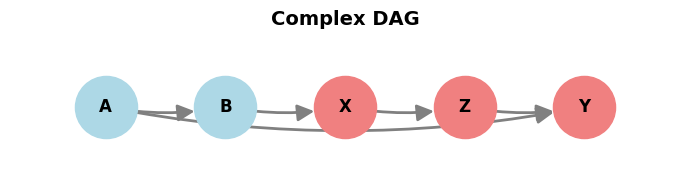

True P(Y=1 | do(X=1)) = 0.501819

Potency computation for intervention on node 'A':
  Observational width: 0.051795
  Interventional width: 0.051795
  True Potency: 0.000000


3.425038030968608e-14

In [12]:
# 1. Generate a confounding DAG
dag = DAG()
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
Z = dag.add_node('Z', support={0, 1})
dag.add_edge(Z, Y)
A = dag.add_node('A', support={0, 1}, partition='L')
B = dag.add_node('B', support={0, 1}, partition='L')
dag.add_edge(A, B)
dag.add_edge(B, X)
dag.add_edge(X, Z)
dag.add_edge(A, Y)

dag.generate_all_response_types()

fig = dag.draw(figsize=(7, 2), title="Complex DAG", with_labels=True)
plt.show()

# 3. Generate Data
generator = DataGenerator(dag, seed=234)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]

# generator.print_true_distribution()
true_prob = generator.computeTrueIntervention(
    Y={Y}, 
    X={X}, 
    Y_values=(1,), 
    X_values=(1,)
)
print(f"True P(Y=1 | do(X=1)) = {true_prob:.6f}")
# 4. Create SCM
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

lp.potency_true(intervention_node=A, observed_nodes={B, X, Z, Y}, generator=generator, verbose=True)



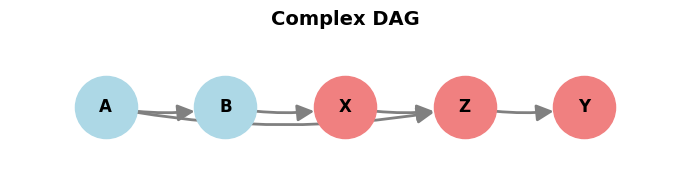

True P(Y=1 | do(X=1)) = 0.579250

Potency computation for intervention on node 'A':
  Observational width: 0.051795
  Interventional width: 0.051795
  True Potency: -0.000000


-4.6629367034256575e-14

In [30]:
# 1. Generate a confounding DAG
dag = DAG()
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
Z = dag.add_node('Z', support={0, 1})
dag.add_edge(Z, Y)
A = dag.add_node('A', support={0, 1}, partition='L')
B = dag.add_node('B', support={0, 1}, partition='L')
dag.add_edge(A, B)
dag.add_edge(B, X)
dag.add_edge(X, Z)
dag.add_edge(A, Z)

dag.generate_all_response_types()

fig = dag.draw(figsize=(7, 2), title="Complex DAG", with_labels=True)
plt.show()

# 3. Generate Data
generator = DataGenerator(dag, seed=234)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]

# generator.print_true_distribution()
true_prob = generator.computeTrueIntervention(
    Y={Y}, 
    X={X}, 
    Y_values=(1,), 
    X_values=(1,)
)
print(f"True P(Y=1 | do(X=1)) = {true_prob:.6f}")
# 4. Create SCM
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

lp.potency_true(intervention_node=A, observed_nodes={B, X, Z, Y}, generator=generator, verbose=True)



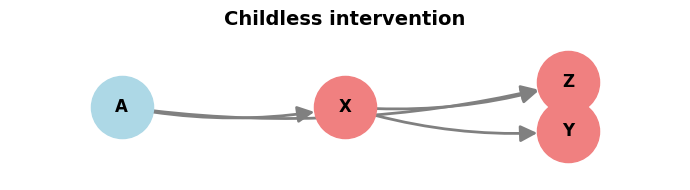

True P(Y=1 | do(X=1)) = 0.308170

Potency computation for intervention on node 'Z':
  Observational width: 0.051795
  Interventional width: 0.051795
  True Potency: -0.000000


-1.2490009027033011e-14

In [31]:
# 1. Generate a confounding DAG
dag = DAG()
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
Z = dag.add_node('Z', support={0, 1})
A = dag.add_node('A', support={0, 1}, partition='L')
dag.add_edge(X, Y)
dag.add_edge(A, X)
dag.add_edge(A, Z)
dag.add_edge(X, Z)

dag.generate_all_response_types()

fig = dag.draw(figsize=(7, 2), title="Childless intervention", with_labels=True)
plt.show()

# 3. Generate Data
generator = DataGenerator(dag, seed=234)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]

# generator.print_true_distribution()
true_prob = generator.computeTrueIntervention(
    Y={Y}, 
    X={X}, 
    Y_values=(1,), 
    X_values=(1,)
)
print(f"True P(Y=1 | do(X=1)) = {true_prob:.6f}")
# 4. Create SCM
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

lp.potency_true(intervention_node=Z, observed_nodes={A, X, Y}, generator=generator, verbose=True)



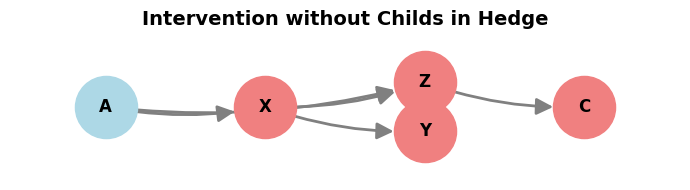

True P(Y=1 | do(X=1)) = 0.394750


{'dag_structure': 'U_L -> A, U_R -> C, U_R -> X, U_R -> Z, U_R -> Y, A -> X, A -> Z, X -> Y, X -> Z, Z -> C',
 'node_domains': {'A': 2, 'X': 2, 'Y': 2, 'Z': 2, 'C': 2},
 'unobserved_nodes': 'U_L,U_R'}

In [ ]:
# 1. Generate a confounding DAG
dag = DAG()
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
Z = dag.add_node('Z', support={0, 1})
C = dag.add_node('C', support={0, 1})
A = dag.add_node('A', support={0, 1}, partition='L')
dag.add_edge(X, Y)
dag.add_edge(A, X)
dag.add_edge(A, Z)
dag.add_edge(X, Z)
dag.add_edge(Z, C)

dag.generate_all_response_types()

fig = dag.draw(figsize=(7, 2), title="Intervention without Childs in Hedge", with_labels=True)
plt.show()

# 3. Generate Data
generator = DataGenerator(dag, seed=234)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]

# generator.print_true_distribution()
true_prob = generator.computeTrueIntervention(
    Y={Y}, 
    X={X}, 
    Y_values=(1,), 
    X_values=(1,)
)
print(f"True P(Y=1 | do(X=1)) = {true_prob:.6f}")
# 4. Create SCM
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

# dag.get_autobound_info()

# lp.potency_true(intervention_node=Z, observed_nodes={A, X, Y, C}, generator=generator, verbose=True)
# lp.solve_with_autobound(solver='ipopt')


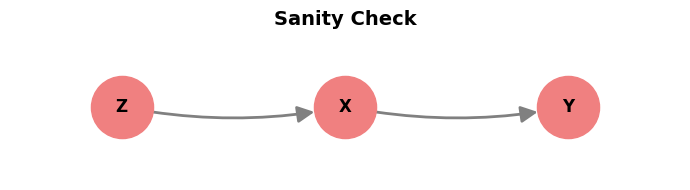

True P(Y=1 | do(X=1)) = 0.394750

Potency computation for intervention on node 'Z':
  Observational width: 0.328041
  Interventional width: 0.051794
  True Potency: 0.276247


0.27624672038261594

In [5]:
# 1. Generate a confounding DAG
dag = DAG()
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
Z = dag.add_node('Z', support={0, 1})
dag.add_edge(X, Y)
dag.add_edge(Z, X)


dag.generate_all_response_types()

fig = dag.draw(figsize=(7, 2), title="Sanity Check", with_labels=True)
plt.show()

# 3. Generate Data
generator = DataGenerator(dag, seed=234)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]

# generator.print_true_distribution()
true_prob = generator.computeTrueIntervention(
    Y={Y}, 
    X={X}, 
    Y_values=(1,), 
    X_values=(1,)
)
print(f"True P(Y=1 | do(X=1)) = {true_prob:.6f}")
# 4. Create SCM
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

lp.potency_true(intervention_node=Z, observed_nodes={X, Y}, generator=generator, verbose=True, solver='glpk')



In [20]:
dag = DAG()
Z = dag.add_node('Z', support={0, 1})
X = dag.add_node('X', support={0, 1})
Y = dag.add_node('Y', support={0, 1})
dag.add_edge(Z, X)
dag.add_edge(X, Y)

dag.generate_all_response_types()

generator = DataGenerator(dag, seed=234)
joint = generator.computeObservedJoint() #Dict[FrozenSet[Tuple[Node, int]], float]
scm = SCM(dag, generator)
lp = ProgramFactory.write_LP(scm, Y={Y}, X={X}, Y_values=(1,), X_values=(1,))

lp.print_objective(in_order=False)
#print(dag.print_response_type_table(X))


OBJECTIVE FUNCTION

minimize  α^T q

Objective vector α (dimension: 32)
Non-zero entries: 16
Zero entries: 16

Non-zero coefficients:
--------------------------------------------------------------------------------
  α[2] =   1.000000    (r_X^1, r_Y^2, r_Z^1)
  α[3] =   1.000000    (r_X^1, r_Y^2, r_Z^2)
  α[6] =   1.000000    (r_X^1, r_Y^4, r_Z^1)
  α[7] =   1.000000    (r_X^1, r_Y^4, r_Z^2)
  α[10] =   1.000000    (r_X^2, r_Y^2, r_Z^1)
  α[11] =   1.000000    (r_X^2, r_Y^2, r_Z^2)
  α[14] =   1.000000    (r_X^2, r_Y^4, r_Z^1)
  α[15] =   1.000000    (r_X^2, r_Y^4, r_Z^2)
  α[18] =   1.000000    (r_X^3, r_Y^2, r_Z^1)
  α[19] =   1.000000    (r_X^3, r_Y^2, r_Z^2)
  α[22] =   1.000000    (r_X^3, r_Y^4, r_Z^1)
  α[23] =   1.000000    (r_X^3, r_Y^4, r_Z^2)
  α[26] =   1.000000    (r_X^4, r_Y^2, r_Z^1)
  α[27] =   1.000000    (r_X^4, r_Y^2, r_Z^2)
  α[30] =   1.000000    (r_X^4, r_Y^4, r_Z^1)
  α[31] =   1.000000    (r_X^4, r_Y^4, r_Z^2)

Zero coefficients:
--------------------------------